### **MA5204: Aprendizaje de Máquinas**

**Departamento de Ingeniería Matemática, Universidad de Chile**

**Profesor:** Felipe Tobar

**Ayudantes:** Alejandro Cuevas, Mauricio Araneda, Mauricio Romero

# Support Vector machines

En este notebook se tienen 2 ejemplos de clasificación con support vector machines, 
1. Con la función de decisión XOR.
2. Clasificación si usuario de red social compra o no producto.

## Ejemplo 1: XOR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Creamos nuestros puntos, muestreamos de una Gaussiana en $\mathbb{R}^2$ y luego dependiendo del cuadrante asignamos la clase $0$ o $1$.

In [2]:
# numero de puntos
n = 2000

# medias 
mean_A = np.array([0, 0])

# matriz covarianza
std = np.eye(2)

# crea datos de una N(0, I) en 2 dim
X= np.random.multivariate_normal(mean_A, std, size =n)

# crea etiquetas
y = np.zeros(n)

for i in range(n):
    if X[i][0]*X[i][1] >= 0:
        y[i]=1
    else:
        y[i]= 0

In [3]:
X

array([[ 1.18360667e+00, -6.83954582e-01],
       [ 3.68185753e-01, -1.95105076e+00],
       [-2.20398333e+00, -1.14836964e-03],
       ...,
       [-8.64524361e-01,  6.63694824e-01],
       [-1.81743299e+00, -1.65085724e+00],
       [-2.06554421e+00,  2.13749561e+00]])

In [4]:
y

array([0., 0., 1., ..., 0., 1., 0.])

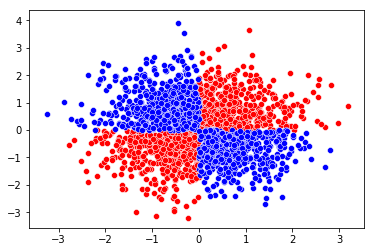

In [5]:
grupo1 = X[y==1]
grupo2 = X[y==0]

plt.scatter(grupo1[:,0], grupo1[:,1], c='red', edgecolor='w', linewidth=0.5)
plt.scatter(grupo2[:,0], grupo2[:,1], c='blue', edgecolor='w', linewidth=0.5)

Separamos entre conjunto de entrenamiento y prueba y luego normalizamos los datos.

In [6]:
# Separamos los datos en entrenamiento y validación
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Es importante escalar los datos al usar SVM
from sklearn.preprocessing import StandardScaler

# crea instancia
sc = StandardScaler()

# entrena y transforma
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Entrenamos el clasificador, para ello usamos SVC (Support Vector classifier)
from sklearn.svm import SVC

# instancia clasificador
classifier = SVC(kernel = 'rbf', degree =5, random_state = 0,verbose=True)

# entrena
classifier.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=True)

In [8]:
#Generamos predicciones con nuestros datos
y_pred = classifier.predict(X_test)

In [9]:
#Vemos que tal nuestros scores
from sklearn.metrics import classification_report, classification, accuracy_score

vmat = classification.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       264
         1.0       0.94      1.00      0.97       236

   micro avg       0.97      0.97      0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



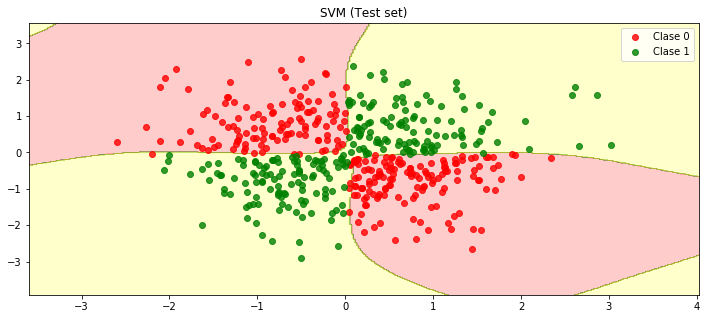

In [10]:
# Visualizamos nuestros resultados en el set de validación
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.02))


plt.figure(figsize=(12, 5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green','yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colorlist = ['red', 'green']
for i in range(2):
    plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1],
                c=colorlist[i], label='Clase ' + str(i), alpha=0.8)
    
plt.title('SVM (Test set)')
plt.legend()
plt.show()

# Ejemplo 2: Social Network

Se tienen datos de una red social, donde se tiene sexo, edad, salario estimado y un perfil de ususario, y se quiere clasificador si son compradores de un producto o no (0 o 1).

In [11]:
# Importar el dataset
dataset = pd.read_csv('../datos/Social_Network_data.csv')
X = dataset.iloc[:, [1,2,3]].values
y = dataset.iloc[:, 4].values


In [12]:
#La primera variable y la segunda son categóricas
X

#La primera es el perfil memero (De 5): 4 chan, normie, Fedora, nihilista o dank

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [13]:
#Codificamos variables binarias categoricas (como sexo por ejemplo), usando LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [14]:
#Para variables categoricas que no sean binarias, primero se ocupa labelencoder...
X[:,0]=labelencoder_X.fit_transform(X[:, 0])
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [15]:
X[1]

array([1, 35, 20000], dtype=object)

In [16]:
#Y despues One-Hot_encoder 
onehotencoder = OneHotEncoder(categories='auto')
#En categorical_features se coloca un arreglo en donde van las columnas de variables categoricas (En este caso solo la primera columna)

X = onehotencoder.fit_transform(X).toarray()

In [17]:
X[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
# Separamos los datos en entrenamiento y validación
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Es importante escalar los datos al usar SVM
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# Entrenamos el clasificador, para ello usamos SVC (Support Vector classifier)
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0,verbose=True, gamma='scale')
classifier.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=True)

In [20]:
#Generamos predicciones con nuestros datos
y_pred = classifier.predict(X_test)

In [21]:
#Vemos que tal nuestros scores
from sklearn.metrics import classification_report, classification, accuracy_score
vmat = classification.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        58
           1       0.67      0.73      0.70        22

   micro avg       0.82      0.82      0.82        80
   macro avg       0.78      0.79      0.79        80
weighted avg       0.83      0.82      0.83        80

